# Notebook Imports and Packages

In [216]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from math import log
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Example 1

## $f(x) = x^2 + x + 1$

In [217]:
def f(x):
    return x**2 + x + 1

In [218]:
# Make Data
x_1 = np.linspace(start = -3, stop = 3, num = 500)

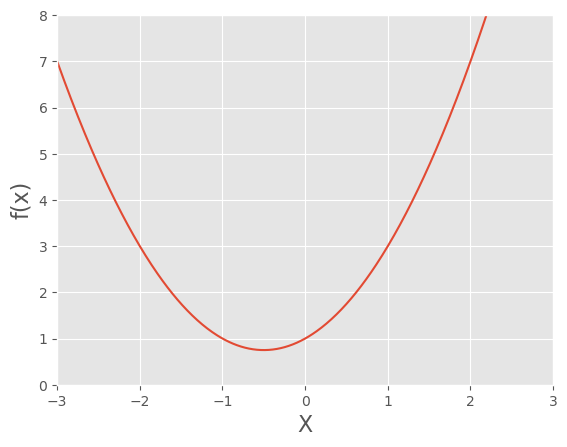

In [219]:
# Plot 
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel("X", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)
plt.plot(x_1, f(x_1))
plt.show()
plt.style.use('ggplot')

## Slope and Derivatives

In [220]:
def df(x):
    return 2*x + 1
    

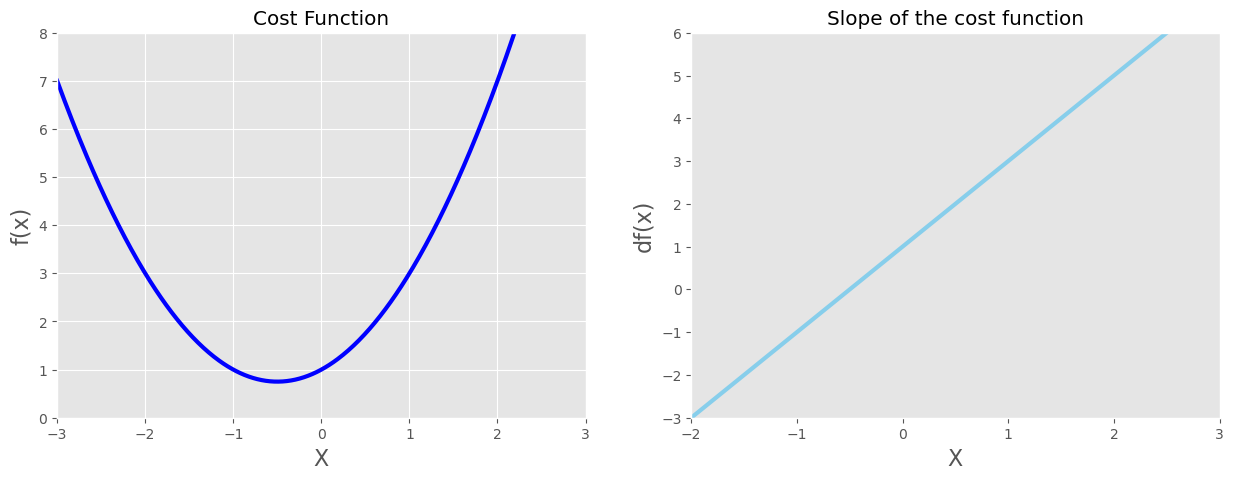

In [221]:
# Plot function and Derivative side by side

plt.figure(figsize = [15, 5])

# 1st Chart Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost Function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)
plt.plot(x_1, f(x_1), color = 'blue', lw = 3)

# 2nd Chart Derivative
plt.subplot(1, 2, 2)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.title('Slope of the cost function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)
plt.plot(x_1, df(x_1), color = 'skyblue', lw = 3)
plt.show()


## Gradient Descent

In [222]:
# Gradient Descent
# new_x = new intercept 
# previous_x = old intercept 
# step_multiplier = learning rate 
# precision = the precision of the local minimum
#step_size = the value of each step taken to get closer to the local minimum

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

#For graphing the values of new intercept and slope

x_list = [new_x]
slope_list = [df(new_x)]

# The value of x(prev = old intercept, new = new intercept) is the intercept and the value of gradient is the (new) slope.
for i in range(1000):
    previous_x = new_x
    gradient = df(previous_x) 
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    #Appending the new values for intercept and slope into our list for graphing.
    x_list.append(new_x)
    slope_list.append(df(new_x))
    #Condition for precision needed from the gradient descent algorithm
    if step_size < precision:
        print("Loop ran this many times: ",i)
        break
    
print("The local minimum occurs at: ", new_x)
print('Slope or df(x) value at this point is : ', df(new_x))
print('f(x) vaue or cost at this point is: ', f(new_x))

Loop ran this many times:  40
The local minimum occurs at:  -0.49962781616118024
Slope or df(x) value at this point is :  0.0007443676776395236
f(x) vaue or cost at this point is:  0.7500001385208099


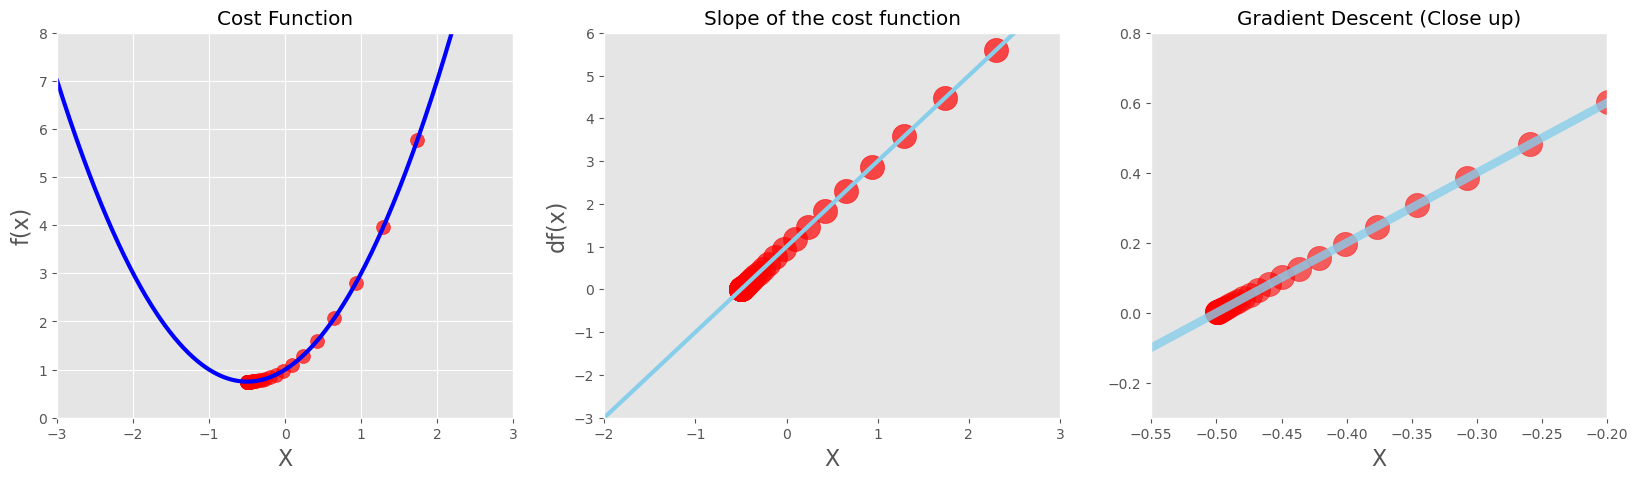

In [223]:
# Superimpose the Gradient Descent calculations

plt.figure(figsize = [20, 5])

# 1st Chart Cost Function
plt.subplot(1, 3, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost Function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("f(x)", fontsize = 16)

plt.plot(x_1, f(x_1), color = 'blue', lw = 3)
#To change the type of "x_list" from a list to an array
values = np.array(x_list)

plt.scatter(x_list, f(values), s= 100, alpha = 0.7, color = "red")

# 2nd Chart Derivative
plt.subplot(1, 3, 2)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title('Slope of the cost function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)

plt.plot(x_1, df(x_1), color = 'skyblue', lw = 3)
plt.scatter(x_list, slope_list, s = 300, alpha = 0.7, color = "red")


# 3rd Chart Gradient Descent Close up
plt.subplot(1, 3, 3)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.title('Gradient Descent (Close up)')
plt.xlabel("X", fontsize = 16)

plt.plot(x_1, df(x_1), color = 'skyblue', lw = 6, alpha = 0.8)
plt.scatter(x_list, slope_list, s = 300, alpha = 0.6, color = "red")
plt.style.use("ggplot")

plt.show()

# Example 2 - Multiple Minima vs Initial  Guess & Advanced Functions

## $$ g(x) = x^4 - 4x^2 + 5 $$

In [224]:
# Make some data
x_2 = np.linspace(-2,2,1000)

#Function
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x

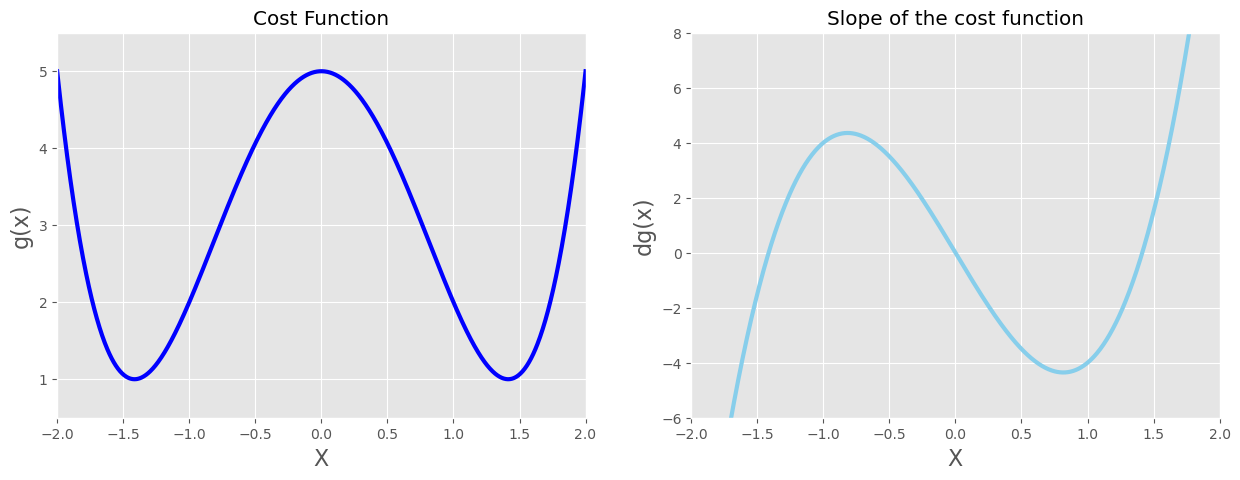

In [225]:
# Plot function and Derivative side by side

plt.figure(figsize = [15, 5])

# 1st Chart Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)
plt.plot(x_2, g(x_2), color = 'blue', lw = 3)

# 2nd Chart Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of the cost function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)
plt.plot(x_2, dg(x_2), color = 'skyblue', lw = 3)
plt.show()

## Gradient Descent as a Python Function

In [226]:
# Gradient Descent Function

#step_size = the value of each step taken to get closer to the local minimum

def gradient_descent(derivative_func,initial_guess, multiplier= 0.02, precision = 0.001, max_iter = 300):
    
    new_x = initial_guess

    #For graphing the values of new intercept and slope later

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    # The value of x(prev = old intercept, new = new intercept) is the intercept and the value of gradient is the (new) slope.
    for i in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x) 
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        #Appending the new values for intercept and slope into our list for graphing.
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        #Condition for precision needed from the gradient descent algorithm
        if step_size < precision:
            break
    return new_x, x_list, slope_list


In [227]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0)
print("Local min occurs at", local_min)
print("Number of steps:", len(list_x))

Local min occurs at 0.0
Number of steps: 2


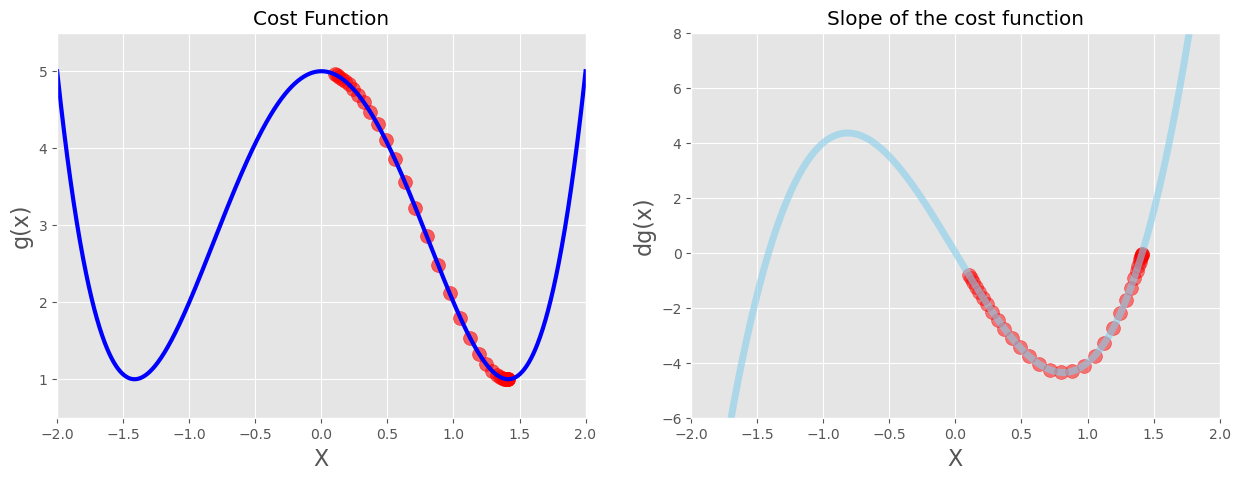

In [228]:

#Calling Gradient Descent Function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.1)
#Plot function and Derivative and scatter plot side by side

plt.figure(figsize = [15, 5])

# 1st Chart Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)
plt.plot(x_2, g(x_2), color = 'blue', lw = 3)
plt.scatter(list_x,g(np.array(list_x)), color = 'red', s =100, alpha = 0.6)

# 2nd Chart Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of the cost function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)
plt.plot(x_2, dg(x_2), color = 'skyblue', lw = 5,  alpha = 0.6)
plt.scatter(list_x,deriv_list, color = 'red', alpha = 0.5 , s = 100)
plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$ h(x) = x^5 -2x^4 + 2$$

In [229]:
# Make some data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)
def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

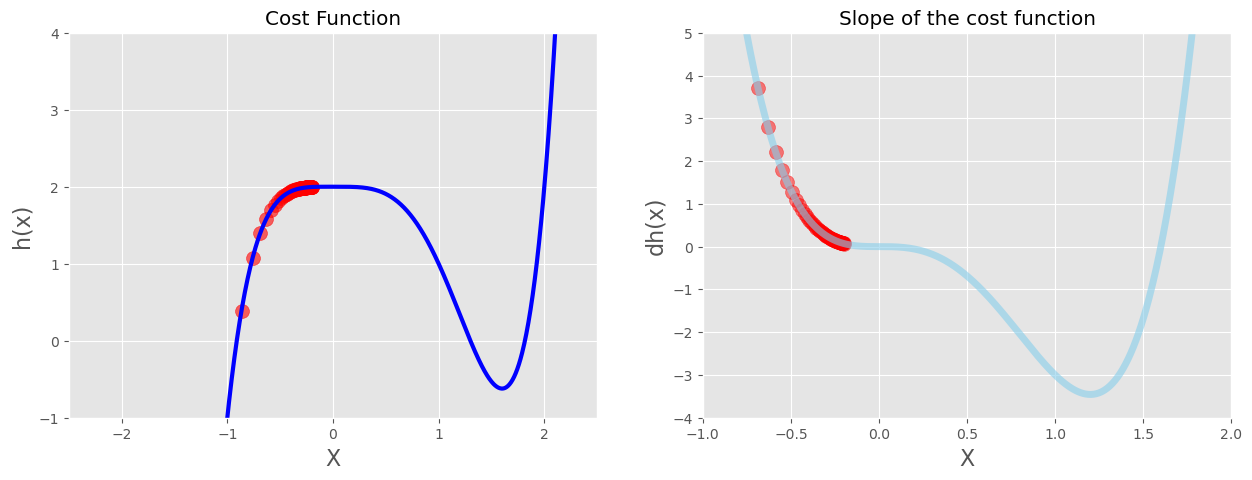

In [230]:
#Calling Gradient Descent Function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2, max_iter = 71)
#Plot function and Derivative and scatter plot side by side

plt.figure(figsize = [15, 5])

# 1st Chart Cost Function
plt.subplot(1, 2, 1)
plt.xlim(-2.5, 2.5)
plt.ylim(-1, 4 )
plt.title('Cost Function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("h(x)", fontsize = 16)
plt.plot(x_3, h(x_3), color = 'blue', lw = 3)
plt.scatter(list_x,h(np.array(list_x)), color = 'red', s =100, alpha = 0.6)

# 2nd Chart Derivative
plt.subplot(1, 2, 2)
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.title('Slope of the cost function')
plt.xlabel("X", fontsize = 16)
plt.ylabel("dh(x)", fontsize = 16)
plt.plot(x_3, dh(x_3), color = 'skyblue', lw = 5,  alpha = 0.6)
plt.scatter(list_x,deriv_list, color = 'red', alpha = 0.5 , s = 100)
plt.show()

In [231]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2, max_iter = 71)
print("Local min occurs at", local_min)
print("Cost at this minimum: ",h(local_min))
print("Number of steps:", len(list_x))

Local min occurs at -1.8398461123332792e+24
Cost at this minimum:  -2.1081790694225687e+121
Number of steps: 72


In [232]:
# Creating a tuple- tuple packing
data_tuple = gradient_descent(derivative_func = dh, initial_guess = 0.2)
print("The local minimum occurs at", data_tuple[0])
print("cost at this minimum is: ", h(data_tuple[0]))
print("Number of steps is ", len(data_tuple[1]))

The local minimum occurs at 1.5989534547394717
cost at this minimum is:  -0.6214287992331258
Number of steps is  117


# The Learning Rate

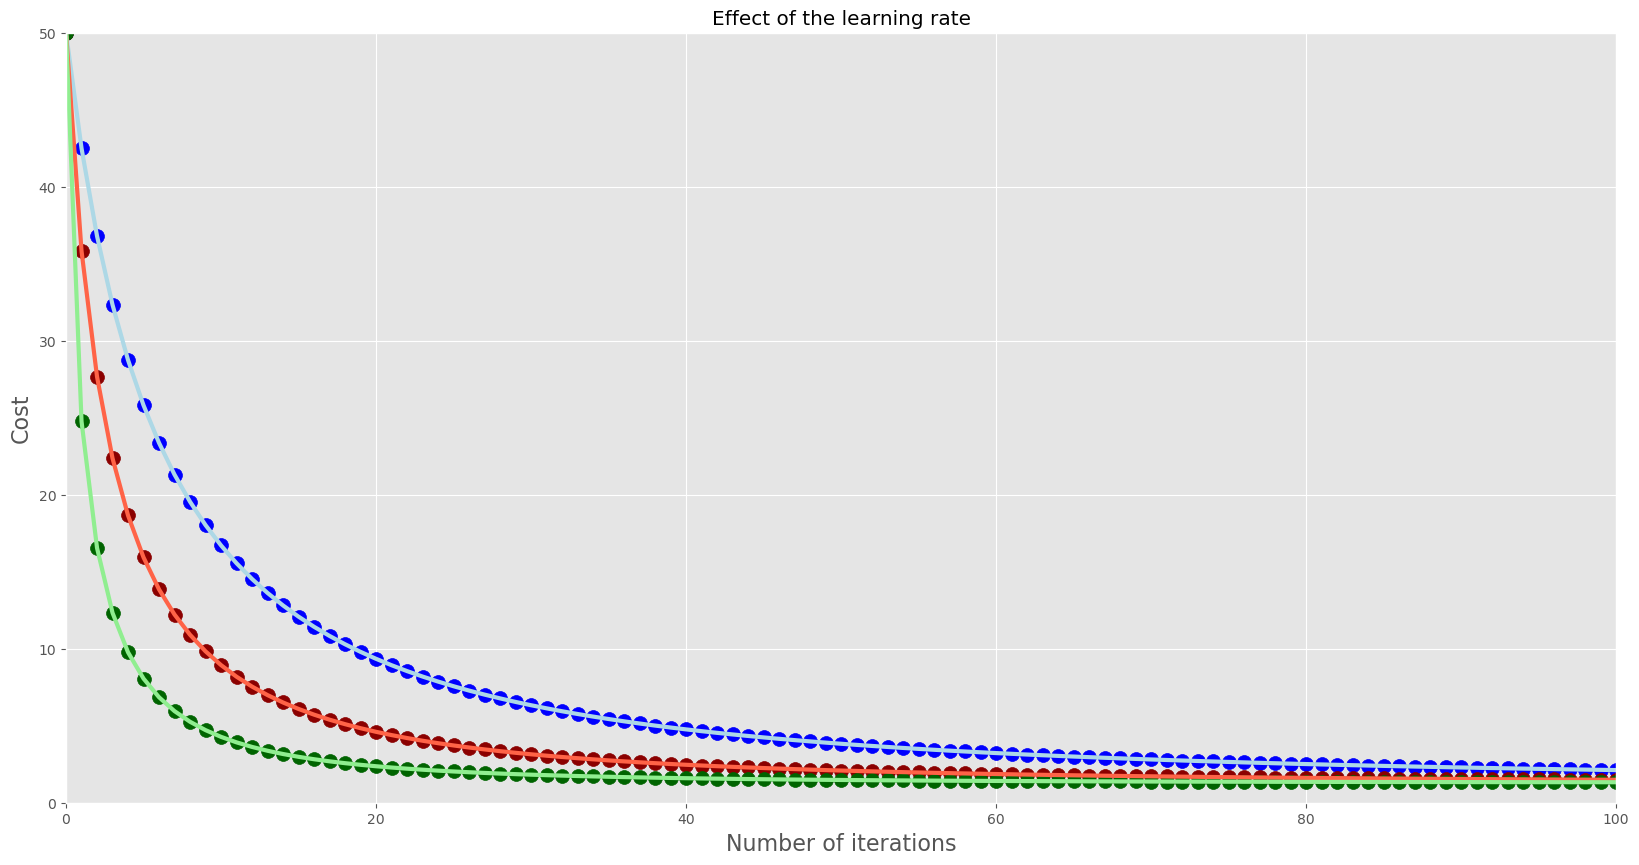

In [233]:
#Run Gradient descent 3 Times

n = 100
low_gamma = gradient_descent(derivative_func = dh, initial_guess = 3, max_iter = n, multiplier = 0.0005, precision = 0.0001)
mid_gamma = gradient_descent(derivative_func = dh, initial_guess = 3, max_iter = n, multiplier = 0.001, precision = 0.0001)
high_gamma = gradient_descent(derivative_func = dh, initial_guess = 3, max_iter = n, multiplier = 0.002, precision = 0.0001)
#Plotting REDUCTION IN COST FOR EACH ITERATION

plt.figure(figsize = [20, 10])

plt.xlim(0, n)
plt.ylim(0, 50 )
plt.title('Effect of the learning rate')
plt.xlabel("Number of iterations", fontsize = 16)
plt.ylabel("Cost", fontsize = 16)
#Values for our charts
# 1) Y-Axis Data
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X- Axis Data: 
iteration_list = list(range(0,n+1))
# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color = 'lightblue', lw = 3)
plt.plot(iteration_list, g(mid_values), color = 'tomato', lw = 3)
plt.plot(iteration_list, g(high_values), color = 'lightgreen', lw = 3)
plt.scatter(iteration_list, g(low_values), color = 'blue', s =100)
plt.scatter(iteration_list, g(mid_values), color = 'darkred', s =100)
plt.scatter(iteration_list, g(high_values), color = 'darkgreen', s =100)
plt.show()

# Example 4 - Data Viz with 3D Charts
## $$ f(x,y) = \frac{1}{3^{-x^2 - y^2}}$$

In [234]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1 / (r + 1)

In [235]:
# Make some datatatatata
x_4 = np.linspace(start = -2, stop = 2, num = 500)
y_4 = np.linspace(start = -2, stop = 2, num = 500) 

print('SHape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4,y_4)

SHape of X array (500,)


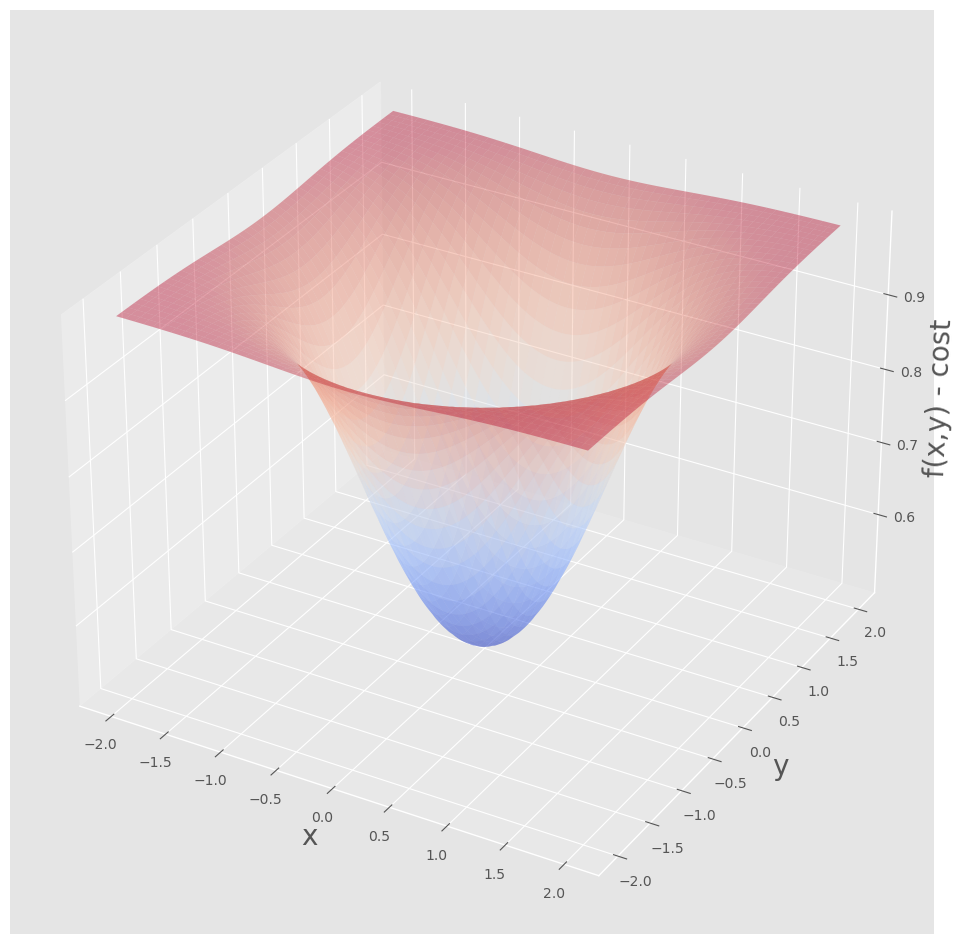

In [236]:
#Generating 3D Plot
fig = plt.figure(figsize = [16,12])
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel("x", fontsize = 20)
ax.set_ylabel("y", fontsize = 20)
ax.set_zlabel("f(x,y) - cost", fontsize = 20)
ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap = cm.coolwarm, alpha = 0.4)
plt.show()

## Partial Derivatives and Symbolic Computation

# $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2-y^2}} {(3^{-x^2-y^2} + 1)^2}$$
# $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2-y^2}} {(3^{-x^2-y^2} + 1)^2}$$

In [237]:
a, b = symbols('x, y')
print("Our cost function f(x,y) is", f(a,b))
print('Partial Derivative wrt x is: ', diff(f(a,b), b))
print('Value of f(x,y) at x = 1.8 y = 1.0 is: ',f(a,b).evalf(subs = {a:1.8, b:1.0}))
print("Value of the Partial derivative wrt x: ", diff(f(a,b),a).evalf(subs = {a:1.8, b:1.0}))

Our cost function f(x,y) is 1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x = 1.8 y = 1.0 is:  0.990604794032582
Value of the Partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [238]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs = {a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs = {a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))
    

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [239]:
def fpx(x,y):
    return 2*3**(-x**2 - y**2)*x*math.log(3)/(3**(-x**2 - y**2) + 1)**2

In [240]:
def fpy(x,y):
    return 2*3**(-x**2 - y**2)*y*math.log(3)/(3**(-x**2 - y**2) + 1)**2

In [241]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(x = params[0],y = params[1])
    gradient_y = fpy(x = params[0], y = params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))
    

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [242]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(x = params[0],y = params[1])
    gradient_y = fpy(x = params[0], y = params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(arr = values_array, values = params.reshape(1,2),axis = 0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


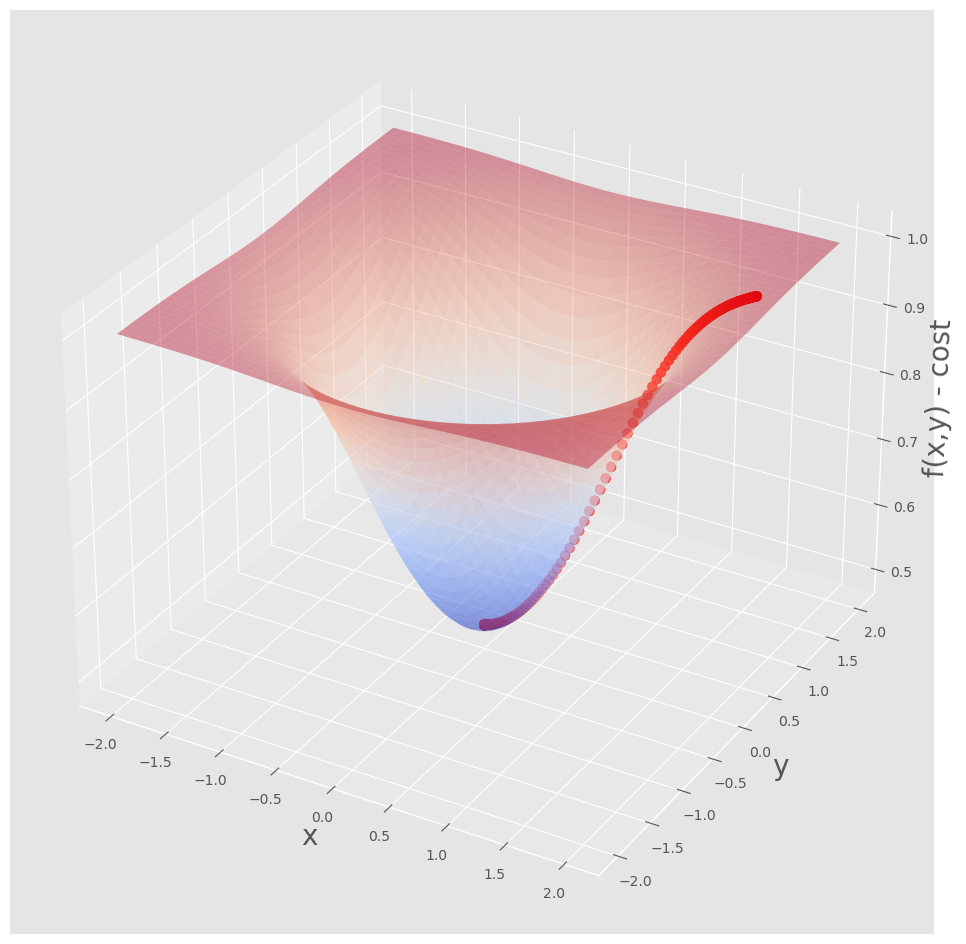

In [243]:
#Generating 3D Plot
fig = plt.figure(figsize = [16,12])
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel("x", fontsize = 20)
ax.set_ylabel("y", fontsize = 20)
ax.set_zlabel("f(x,y) - cost", fontsize = 20)
ax.plot_surface(x_4, y_4, f(x_4,y_4), cmap = cm.coolwarm, alpha = 0.4)
ax.scatter(values_array[: , 0],values_array[:, 1], f(values_array[:, 0], values_array[:,1]),s = 50, color = 'red',)
plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$ RSS = \sum_{i = 1}^{n} \big(y^{(i)} - h_\theta x\big)^2 $$
### $$ MSE =\frac {1}{n}\sum_{i = 1}^{n} \big(y^{(i)} - h_\theta x^{(i)}\big)^2 $$
### $$ MSE =\frac {1}{n}\sum_{i = 1}^{n} \big(y - \hat y\big)^2 $$

In [244]:
#Making some data
x_5 = np.array([[0.1,1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose()


In [245]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5,y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


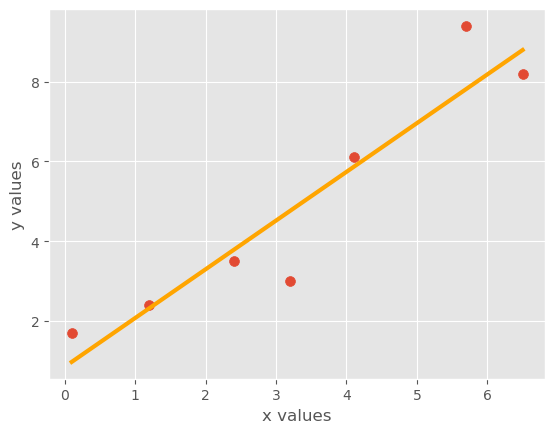

In [246]:
plt.scatter(x_5, y_5, s = 50)
plt.plot(x_5, regr.predict(x_5), color='orange', lw = 3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

y_hat = regr.intercept_[0] + regr.coef_[0][0] * x_5
print(y_hat)


In [247]:
def mse(y,y_hat):
    mse_calc = np.average((y_5-y_hat)**2, axis = 0)
    return mse_calc
#return 1/y.size *)

In [248]:
print("Manually calculated MSE is: ", mse(y_5,y_hat))
print("MSE regression using manual calc is", mean_squared_error(y_5, y_hat))
print("MSE regression  is", mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is:  [80.12428571]
MSE regression using manual calc is 80.12428571428572
MSE regression  is 0.9479655759794577


# 3D Plot for the MSE Cost Function

## Make data for thetas

In [249]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop = 3, num = nr_thetas)
th_1 = np.linspace(start=-1, stop = 3, num = nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0,th_1)


# Calc MSE using nested for loops

In [250]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
plot_cost

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [251]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]* x_5
        plot_cost[i][j] = mse(y_5, y_hat)
plot_cost
        

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

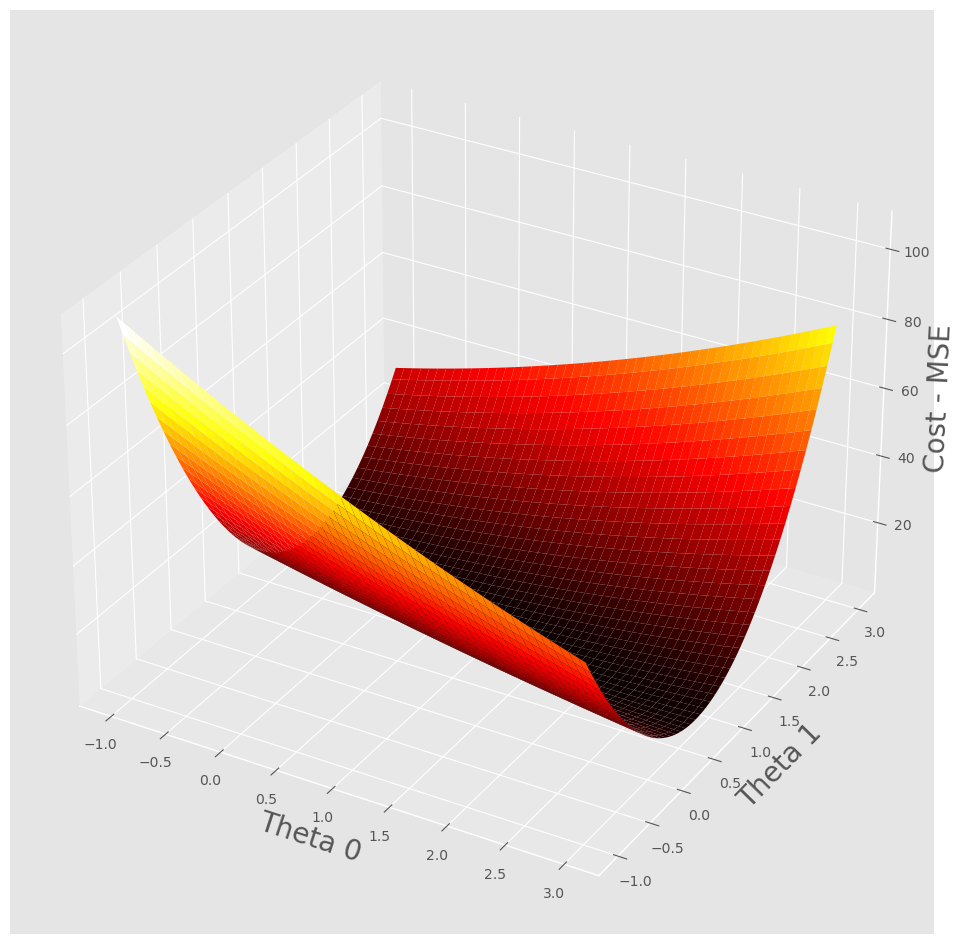

In [252]:
#Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('Cost - MSE', fontsize = 20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.hot)
plt.scatter
plt.show()

## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

## $$\frac {\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1x^{(i)}\big)$$
## $$\frac {\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1x^{(i)}\big)\big(x^{(i)}\big)$$

# MSE & Gradient Descent

In [253]:
# x values, y values, array of theta parameters (theta) at index 0 and theta 1 at index 1
def grad(x,y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x))
    theta1_slope = (-2/n) * sum(((y - thetas[0] - thetas[1] * x)*x))
    return np.append(arr = theta0_slope, values = theta1_slope)
    

In [256]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

# Collect Data Points for scatter point
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]* x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)),axis = 0)
    mse_vals = np.append(arr = mse_vals, values = mse(y_5, thetas[0] + thetas[1]*x_5))
    
    
print("Min occurs at Theta 0:", thetas[0])
print("Min occurs at Theta 1:", thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


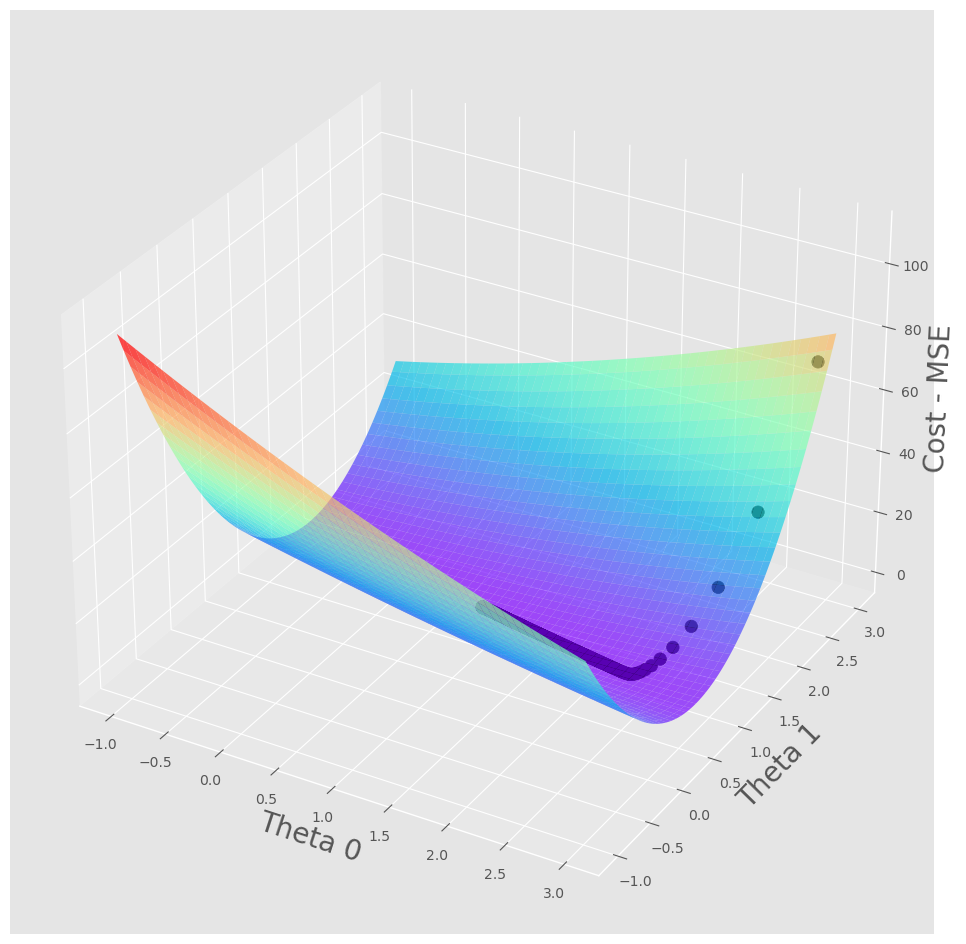

In [267]:
#Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('Cost - MSE', fontsize = 20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.rainbow, alpha=0.7)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s = 80, color = 'black', alpha = 1)
plt.show()